In [1]:
import pandas as pd                                                 
import matplotlib.pyplot as plt                                      
import seaborn as sns                                            
import numpy as np                                                   
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


Dataset Description:
train.csv - 29050 rows x 55 columns

test.csv - 551962 rows x 54 columns

sample_submission.csv - Accepted submission format

Attribute Information:

Elevation - Elevation in meters

Aspect - Aspect in degrees

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to the nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area

2 - Neota Wilderness Area

3 - Comanche Peak Wilderness Area

4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubble.

4 Ratake family - Rock outcrop complex, rubble.

5 Vanet family - Rock outcrop complex, rubble.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubble.

11 Bullwark - Catamount families - Rock land complex, rubble.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bulwark family complex, rubble.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely boulder.

23 Leighcan family, till substratum - Typic Cryaquolls complex.

24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.

In [2]:
df_train = pd.read_csv('D:\\Machine Hacks\\Hackathon 6\\Forest_Cover_participants_Data\\train.csv')
df_test = pd.read_csv('D:\\Machine Hacks\\Hackathon 6\\Forest_Cover_participants_Data\\test.csv')

In [4]:
df_train.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2982,186,14,323,66,5351,222,249,158,1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2929,243,15,335,33,5778,189,251,198,6429,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,3051,162,12,1224,253,3182,231,243,142,1167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
3,3090,345,17,362,92,2460,184,211,164,2384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,3023,4,9,234,51,4994,208,222,151,3813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7


In [5]:
df_test.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2798,151,12,60,-5,3373,236,240,132,6083,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3582,96,34,420,80,2579,250,170,19,3771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2619,171,12,270,-52,2764,228,245,147,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2897,155,5,210,14,2437,226,240,149,2455,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2845,32,12,309,47,2778,217,213,129,42,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
print(df_train.shape)
print(df_test.shape)

(29050, 55)
(551962, 54)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29050 entries, 0 to 29049
Data columns (total 55 columns):
Elevation(meters)                             29050 non-null int64
Aspect(degrees)                               29050 non-null int64
Slope(degrees)                                29050 non-null int64
Horizontal_Distance_To_Hydrology(meters)      29050 non-null int64
Vertical_Distance_To_Hydrology(meters)        29050 non-null int64
Horizontal_Distance_To_Roadways(meters)       29050 non-null int64
Hillshade_9am                                 29050 non-null int64
Hillshade_Noon                                29050 non-null int64
Hillshade_3pm                                 29050 non-null int64
Horizontal_Distance_To_Fire_Points(meters)    29050 non-null int64
Wilderness_Area_1                             29050 non-null int64
Wilderness_Area_2                             29050 non-null int64
Wilderness_Area_3                             29050 non-null int64
Wilderness_Area_4   

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551962 entries, 0 to 551961
Data columns (total 54 columns):
Elevation(meters)                             551962 non-null int64
Aspect(degrees)                               551962 non-null int64
Slope(degrees)                                551962 non-null int64
Horizontal_Distance_To_Hydrology(meters)      551962 non-null int64
Vertical_Distance_To_Hydrology(meters)        551962 non-null int64
Horizontal_Distance_To_Roadways(meters)       551962 non-null int64
Hillshade_9am                                 551962 non-null int64
Hillshade_Noon                                551962 non-null int64
Hillshade_3pm                                 551962 non-null int64
Horizontal_Distance_To_Fire_Points(meters)    551962 non-null int64
Wilderness_Area_1                             551962 non-null int64
Wilderness_Area_2                             551962 non-null int64
Wilderness_Area_3                             551962 non-null int64
Wilde

In [9]:
### lets concat training and testing for better understanding 


df_train["data"] = "train"
df_test["data"] = "test"
df_test["Cover_Type"] = np.nan

In [10]:
## concating 

tot_df = pd.concat([df_train,df_test],axis=0)

In [11]:
tot_df

,Aspect(degrees),Cover_Type,Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Vertical_Distance_To_Hydrology(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,data
0,186,5.0,2982,158,222,249,1530,323,5351,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,0,0,0,train
1,243,7.0,2929,198,189,251,6429,335,5778,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,1,0,0,0,train
2,162,5.0,3051,142,231,243,1167,1224,3182,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,253,0,0,1,0,train
3,345,7.0,3090,164,184,211,2384,362,2460,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,0,0,1,0,train
4,4,7.0,3023,151,208,222,3813,234,4994,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,1,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551957,124,NaN,3294,135,233,235,1277,342,4119,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194,1,0,0,0,test
551958,153,NaN,3186,83,239,220,1566,433,1814,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,1,0,0,0,test
551959,221,NaN,2914,176,209,249,1676,127,2040,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,1,0,test
551960,31,NaN,3045,145,219,228,1500,361,2894,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,1,0,test


In [12]:
### lets see the skewness of the entire dataset 

print("Skewness of train_data : ")
print(tot_df.skew())

Skewness of train_data : 
Aspect(degrees)                                 0.402628
Cover_Type                                     -1.158339
Elevation(meters)                              -0.817596
Hillshade_3pm                                  -0.277053
Hillshade_9am                                  -1.181147
Hillshade_Noon                                 -1.063056
Horizontal_Distance_To_Fire_Points(meters)      1.288644
Horizontal_Distance_To_Hydrology(meters)        1.140437
Horizontal_Distance_To_Roadways(meters)         0.713679
Slope(degrees)                                  0.789273
Soil_Type_1                                    13.736670
Soil_Type_10                                    3.855317
Soil_Type_11                                    6.621186
Soil_Type_12                                    4.054662
Soil_Type_13                                    5.510281
Soil_Type_14                                   31.096237
Soil_Type_15                                  440.078023
Soil_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

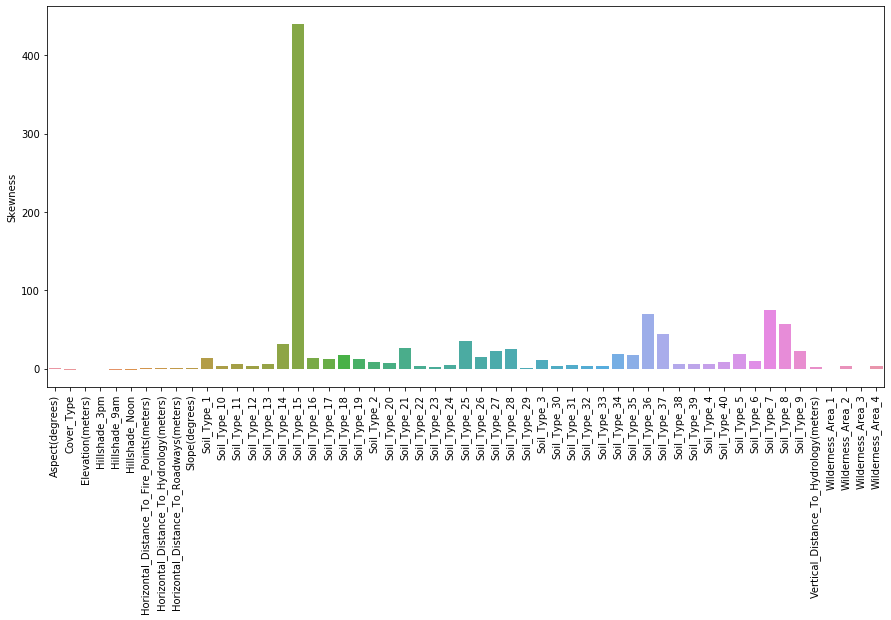

In [13]:
## lets visualize it 

skew1 = tot_df.skew()
skew_df1 = pd.DataFrame(skew1 , index = None , columns = ["Skewness"])

plt.figure(figsize = (15 , 7))
sns.barplot(x = skew_df1.index, y = 'Skewness' , data = skew_df1)
plt.xticks(rotation = 90)

In [14]:
## we need to reaarange the columns 

cols = tot_df.columns.tolist()
cols

['Aspect(degrees)',
 'Cover_Type',
 'Elevation(meters)',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points(meters)',
 'Horizontal_Distance_To_Hydrology(meters)',
 'Horizontal_Distance_To_Roadways(meters)',
 'Slope(degrees)',
 'Soil_Type_1',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_2',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_3',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_4',
 'Soil_Type_40',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Vertical_Distance_To_Hydrology(meters)',
 'Wilderness_Area_1

In [15]:
cols.insert(54, cols.pop(cols.index('Cover_Type')))
cols

['Aspect(degrees)',
 'Elevation(meters)',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points(meters)',
 'Horizontal_Distance_To_Hydrology(meters)',
 'Horizontal_Distance_To_Roadways(meters)',
 'Slope(degrees)',
 'Soil_Type_1',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_2',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_3',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_4',
 'Soil_Type_40',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Vertical_Distance_To_Hydrology(meters)',
 'Wilderness_Area_1',
 'Wilderness

In [16]:
tot_df = tot_df.reindex(columns= cols)
tot_df

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Vertical_Distance_To_Hydrology(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type,data
0,186,2982,158,222,249,1530,323,5351,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,0,0,0,5.0,train
1,243,2929,198,189,251,6429,335,5778,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,1,0,0,0,7.0,train
2,162,3051,142,231,243,1167,1224,3182,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,253,0,0,1,0,5.0,train
3,345,3090,164,184,211,2384,362,2460,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,0,0,1,0,7.0,train
4,4,3023,151,208,222,3813,234,4994,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,1,0,0,0,7.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551957,124,3294,135,233,235,1277,342,4119,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194,1,0,0,0,NaN,test
551958,153,3186,83,239,220,1566,433,1814,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,1,0,0,0,NaN,test
551959,221,2914,176,209,249,1676,127,2040,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,1,0,NaN,test
551960,31,3045,145,219,228,1500,361,2894,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,1,0,NaN,test


In [17]:
## we moved cover type feature to almost last column.. However we need to bring 1 feature (Vertical_Distance_To_Hydrology)
## to the front 

cols1 = tot_df.columns.tolist()
cols1

['Aspect(degrees)',
 'Elevation(meters)',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points(meters)',
 'Horizontal_Distance_To_Hydrology(meters)',
 'Horizontal_Distance_To_Roadways(meters)',
 'Slope(degrees)',
 'Soil_Type_1',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_2',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_3',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_4',
 'Soil_Type_40',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Vertical_Distance_To_Hydrology(meters)',
 'Wilderness_Area_1',
 'Wilderness

In [18]:
cols1.insert(9, cols1.pop(cols1.index('Vertical_Distance_To_Hydrology(meters)')))
cols1

['Aspect(degrees)',
 'Elevation(meters)',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points(meters)',
 'Horizontal_Distance_To_Hydrology(meters)',
 'Horizontal_Distance_To_Roadways(meters)',
 'Slope(degrees)',
 'Vertical_Distance_To_Hydrology(meters)',
 'Soil_Type_1',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_2',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_3',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_4',
 'Soil_Type_40',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Wilderness_Area_1',
 'Wilderness

In [19]:
tot_df = tot_df.reindex(columns= cols1)
tot_df

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Vertical_Distance_To_Hydrology(meters),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type,data
0,186,2982,158,222,249,1530,323,5351,14,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,train
1,243,2929,198,189,251,6429,335,5778,15,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train
2,162,3051,142,231,243,1167,1224,3182,12,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,train
3,345,3090,164,184,211,2384,362,2460,17,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.0,train
4,4,3023,151,208,222,3813,234,4994,9,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551957,124,3294,135,233,235,1277,342,4119,7,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
551958,153,3186,83,239,220,1566,433,1814,33,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
551959,221,2914,176,209,249,1676,127,2040,9,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test
551960,31,3045,145,219,228,1500,361,2894,6,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test


In [20]:
### now the feature moving part is over among the dataframe 
## we can perform the segregation part 

In [21]:
cont_data2 = tot_df.loc[: , 'Aspect(degrees)' : 'Vertical_Distance_To_Hydrology(meters)' ]
bin_data2 = tot_df.loc[: , 'Soil_Type_1' : 'Wilderness_Area_4' ]
wild_data2 = tot_df.loc[: , 'Wilderness_Area_1' : 'Wilderness_Area_4' ]
soil_data2= tot_df.loc[: , 'Soil_Type_1' : 'Soil_Type_9' ]


In [22]:
cont_data2.head()

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Vertical_Distance_To_Hydrology(meters)
0,186,2982,158,222,249,1530,323,5351,14,66
1,243,2929,198,189,251,6429,335,5778,15,33
2,162,3051,142,231,243,1167,1224,3182,12,253
3,345,3090,164,184,211,2384,362,2460,17,92
4,4,3023,151,208,222,3813,234,4994,9,51


In [23]:
bin_data2.head()

,Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
wild_data2.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0


In [25]:
soil_data2.head()

,Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
for i in bin_data2:
    count=bin_data2[i].value_counts()
    print(i,count)

Soil_Type_1 0    577981
1      3031
Name: Soil_Type_1, dtype: int64
Soil_Type_10 0    548378
1     32634
Name: Soil_Type_10, dtype: int64
Soil_Type_11 0    568602
1     12410
Name: Soil_Type_11, dtype: int64
Soil_Type_12 0    551041
1     29971
Name: Soil_Type_12, dtype: int64
Soil_Type_13 0    563581
1     17431
Name: Soil_Type_13, dtype: int64
Soil_Type_14 0    580413
1       599
Name: Soil_Type_14, dtype: int64
Soil_Type_15 0    581009
1         3
Name: Soil_Type_15, dtype: int64
Soil_Type_16 0    578167
1      2845
Name: Soil_Type_16, dtype: int64
Soil_Type_17 0    577590
1      3422
Name: Soil_Type_17, dtype: int64
Soil_Type_18 0    579113
1      1899
Name: Soil_Type_18, dtype: int64
Soil_Type_19 0    576991
1      4021
Name: Soil_Type_19, dtype: int64
Soil_Type_2 0    573487
1      7525
Name: Soil_Type_2, dtype: int64
Soil_Type_20 0    571753
1      9259
Name: Soil_Type_20, dtype: int64
Soil_Type_21 0    580174
1       838
Name: Soil_Type_21, dtype: int64
Soil_Type_22 0    547639

In [27]:
581012/40

14525.3

In [28]:
print('Soil Type',' Occurence_count')
for i in bin_data2:
    count=bin_data2[i].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(i,count)


Soil Type  Occurence_count
Soil_Type_14 599
Soil_Type_15 3
Soil_Type_21 838
Soil_Type_25 474
Soil_Type_28 946
Soil_Type_36 119
Soil_Type_37 298
Soil_Type_7 105
Soil_Type_8 179


In [29]:
### these are the soils that are less than 1000, as we are trying to remove the least ones 

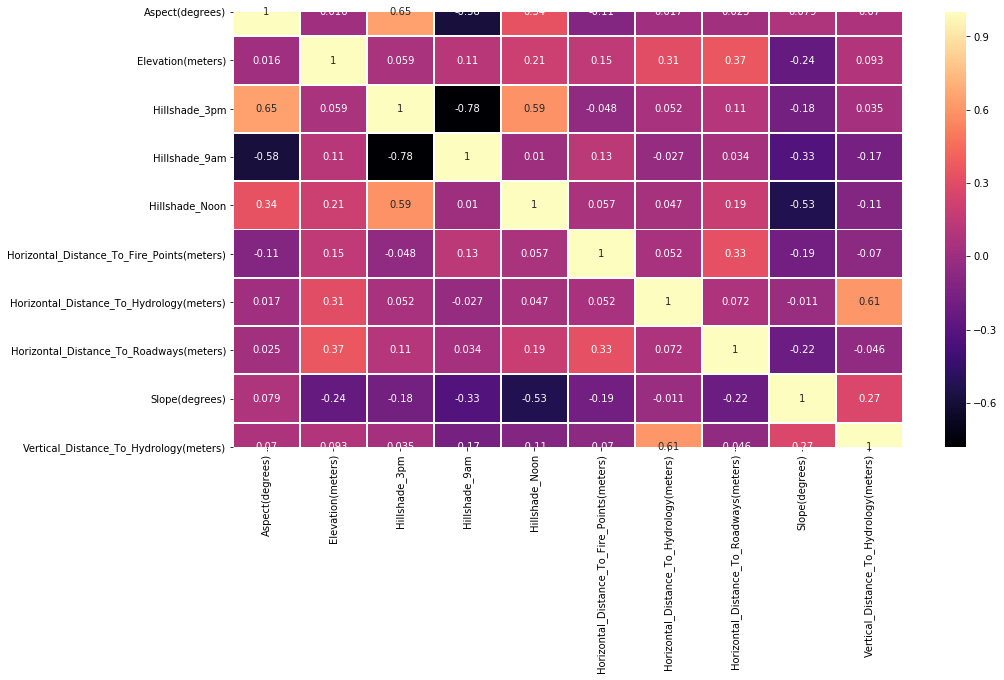

In [30]:
## checking out the cont data correlation

plt.figure(figsize=(15,8))
sns.heatmap(cont_data2.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.show()

In [31]:
### aspect to hillshade3pm and horizontal distance hydrology to vertical distance of hydrology and hillshade noon to hill shade 3pm

In [32]:
tot_df

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Vertical_Distance_To_Hydrology(meters),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type,data
0,186,2982,158,222,249,1530,323,5351,14,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,train
1,243,2929,198,189,251,6429,335,5778,15,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train
2,162,3051,142,231,243,1167,1224,3182,12,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,train
3,345,3090,164,184,211,2384,362,2460,17,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.0,train
4,4,3023,151,208,222,3813,234,4994,9,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551957,124,3294,135,233,235,1277,342,4119,7,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
551958,153,3186,83,239,220,1566,433,1814,33,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
551959,221,2914,176,209,249,1676,127,2040,9,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test
551960,31,3045,145,219,228,1500,361,2894,6,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test


In [33]:
###  lets build the model 

## before that lets split the model 


train_data = tot_df[tot_df['data'] == 'train']
test_data = tot_df[tot_df['data'] == 'test']

In [34]:
test_data.head()

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Vertical_Distance_To_Hydrology(meters),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type,data
0,151,2798,132,236,240,6083,60,3373,12,-5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
1,96,3582,19,250,170,3771,420,2579,34,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,NaN,test
2,171,2619,147,228,245,2008,270,2764,12,-52,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test
3,155,2897,149,226,240,2455,210,2437,5,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test
4,32,2845,129,217,213,42,309,2778,12,47,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,test


In [35]:
train_data.head()

,Aspect(degrees),Elevation(meters),Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points(meters),Horizontal_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Slope(degrees),Vertical_Distance_To_Hydrology(meters),Soil_Type_1,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_2,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_3,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_4,Soil_Type_40,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type,data
0,186,2982,158,222,249,1530,323,5351,14,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,train
1,243,2929,198,189,251,6429,335,5778,15,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train
2,162,3051,142,231,243,1167,1224,3182,12,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,train
3,345,3090,164,184,211,2384,362,2460,17,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.0,train
4,4,3023,151,208,222,3813,234,4994,9,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,train


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29049
Data columns (total 56 columns):
Aspect(degrees)                               29050 non-null int64
Elevation(meters)                             29050 non-null int64
Hillshade_3pm                                 29050 non-null int64
Hillshade_9am                                 29050 non-null int64
Hillshade_Noon                                29050 non-null int64
Horizontal_Distance_To_Fire_Points(meters)    29050 non-null int64
Horizontal_Distance_To_Hydrology(meters)      29050 non-null int64
Horizontal_Distance_To_Roadways(meters)       29050 non-null int64
Slope(degrees)                                29050 non-null int64
Vertical_Distance_To_Hydrology(meters)        29050 non-null int64
Soil_Type_1                                   29050 non-null int64
Soil_Type_10                                  29050 non-null int64
Soil_Type_11                                  29050 non-null int64
Soil_Type_12        

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551962 entries, 0 to 551961
Data columns (total 56 columns):
Aspect(degrees)                               551962 non-null int64
Elevation(meters)                             551962 non-null int64
Hillshade_3pm                                 551962 non-null int64
Hillshade_9am                                 551962 non-null int64
Hillshade_Noon                                551962 non-null int64
Horizontal_Distance_To_Fire_Points(meters)    551962 non-null int64
Horizontal_Distance_To_Hydrology(meters)      551962 non-null int64
Horizontal_Distance_To_Roadways(meters)       551962 non-null int64
Slope(degrees)                                551962 non-null int64
Vertical_Distance_To_Hydrology(meters)        551962 non-null int64
Soil_Type_1                                   551962 non-null int64
Soil_Type_10                                  551962 non-null int64
Soil_Type_11                                  551962 non-null int64
Soil_

In [39]:
train_data['Cover_Type']=train_data['Cover_Type'].astype('category')  ## converting the target into catrgorical

In [40]:
test_data['Cover_Type']=test_data['Cover_Type'].astype('category') 

In [41]:
train_data.columns

Index(['Aspect(degrees)', 'Elevation(meters)', 'Hillshade_3pm',
       'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points(meters)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Slope(degrees)',
       'Vertical_Distance_To_Hydrology(meters)', 'Soil_Type_1', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_2', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_3', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_4',
       'Soil_Type_40', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'S

In [42]:
### now lets build a model 

X = train_data.drop(["data" , "Cover_Type" , 'Hillshade_3pm','Soil_Type_7','Soil_Type_8','Soil_Type_14','Soil_Type_15','Soil_Type_21','Soil_Type_25','Soil_Type_28','Soil_Type_36','Soil_Type_37'] , 1)
y = train_data["Cover_Type"]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [44]:
test_data = test_data.drop(["data" , "Cover_Type" , 'Hillshade_3pm','Soil_Type_7','Soil_Type_8','Soil_Type_14','Soil_Type_15','Soil_Type_21','Soil_Type_25','Soil_Type_28','Soil_Type_36','Soil_Type_37'] , 1 )

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold 
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier


In [48]:
from sklearn.svm import SVC


svc = SVC(probability=True, kernel='linear', C=7)

In [49]:
from sklearn.ensemble impocorrt StackingClassifier ## importing stacking classifier

etc = ExtraTreesClassifier(n_estimators=90, max_features=10)
gbc = GradientBoostingClassifier(n_estimators=100, max_features=8)


In [50]:
estimators = [('gbc',gbc),('etc',etc)]

sc = StackingClassifier(estimators=estimators)

scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [51]:
np.mean(scores)

-0.340619141604506

In [52]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=8)),
                               ('etc',
                                ExtraTreesClassifier(max_features=10,
                                                     n_estimators=90))])

In [53]:
scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [54]:
np.mean(scores)

-0.34618598844209525

In [55]:
## lets predict 

y_pred = sc.predict_proba(test_data)

In [56]:
y_pred

array([[4.16260349e-05, 7.74398152e-03, 2.03424655e-03, ...,
        9.71798732e-01, 2.71401142e-03, 1.56481403e-02],
       [9.79672314e-01, 3.16456086e-04, 3.37051344e-04, ...,
        1.38081701e-03, 1.51899948e-04, 1.77866538e-02],
       [8.51240894e-05, 1.47112459e-02, 5.00177559e-03, ...,
        9.50907696e-01, 7.77005648e-03, 2.14616468e-02],
       ...,
       [2.19361730e-03, 2.33115636e-02, 1.48384575e-03, ...,
        6.74146677e-02, 1.01180740e-03, 9.04345865e-01],
       [1.64831420e-03, 3.63209582e-03, 9.17041335e-04, ...,
        6.85697741e-01, 3.44037867e-04, 3.07669994e-01],
       [1.18536013e-04, 7.77783886e-03, 1.96841094e-03, ...,
        9.48192471e-01, 1.98785355e-03, 3.99194126e-02]])

In [57]:
submission=pd.DataFrame(y_pred)
submission

,0,1,2,3,4,5,6
0,0.000042,0.007744,0.002034,0.000019,0.971799,0.002714,0.015648
1,0.979672,0.000316,0.000337,0.000355,0.001381,0.000152,0.017787
2,0.000085,0.014711,0.005002,0.000062,0.950908,0.007770,0.021462
3,0.000059,0.009860,0.002377,0.000026,0.968697,0.002936,0.016045
4,0.000888,0.005199,0.001431,0.000111,0.146286,0.000806,0.845278
...,...,...,...,...,...,...,...
551957,0.000308,0.000812,0.000226,0.000015,0.988754,0.000081,0.009804
551958,0.006858,0.001057,0.000262,0.000103,0.322154,0.000045,0.669521
551959,0.002194,0.023312,0.001484,0.000239,0.067415,0.001012,0.904346
551960,0.001648,0.003632,0.000917,0.000091,0.685698,0.000344,0.307670


In [58]:
submission.to_excel('sub_final_6.xlsx',index=False)

In [59]:
## lets add random forest 

rfc = RandomForestClassifier(n_estimators=100, max_features=5)
etc = ExtraTreesClassifier(n_estimators=100, max_features=10)
gbc = GradientBoostingClassifier(n_estimators=100, max_features=9)

In [60]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc)]

sc = StackingClassifier(estimators=estimators)

scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [61]:
np.mean(scores)

-0.33827065529346567

In [62]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=9)),
                               ('etc', ExtraTreesClassifier(max_features=10)),
                               ('rfc', RandomForestClassifier(max_features=5))])

In [63]:
scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [64]:
np.mean(scores)

-0.3366381899891081

In [65]:
##lets predict 

ypred_1 = sc.predict_proba(test_data)

In [66]:
ypred_1

array([[4.24364055e-05, 6.83268867e-03, 2.17013360e-03, ...,
        9.70925093e-01, 2.42625705e-03, 1.75902891e-02],
       [9.77842355e-01, 2.20683868e-04, 1.99243848e-04, ...,
        1.23792931e-03, 8.98065643e-05, 2.01309109e-02],
       [1.10781031e-04, 1.26389600e-02, 5.80294146e-03, ...,
        9.48456660e-01, 7.59544128e-03, 2.53305461e-02],
       ...,
       [2.24665671e-03, 1.06396619e-02, 5.84488668e-04, ...,
        4.58751739e-02, 1.98660914e-04, 9.40327854e-01],
       [1.20286245e-03, 4.38840184e-03, 9.20003933e-04, ...,
        6.75267333e-01, 3.04294084e-04, 3.17857764e-01],
       [9.45706748e-05, 6.58600783e-03, 1.83911450e-03, ...,
        9.56825244e-01, 1.58202848e-03, 3.30524290e-02]])

In [67]:
submission=pd.DataFrame(ypred_1)
submission

,0,1,2,3,4,5,6
0,0.000042,0.006833,0.002170,0.000013,0.970925,0.002426,0.017590
1,0.977842,0.000221,0.000199,0.000279,0.001238,0.000090,0.020131
2,0.000111,0.012639,0.005803,0.000065,0.948457,0.007595,0.025331
3,0.000069,0.012700,0.002517,0.000022,0.962342,0.003033,0.019317
4,0.000556,0.006204,0.001480,0.000071,0.174074,0.000653,0.816962
...,...,...,...,...,...,...,...
551957,0.000246,0.001308,0.000321,0.000011,0.985656,0.000134,0.012323
551958,0.010997,0.001043,0.000172,0.000074,0.266499,0.000018,0.721196
551959,0.002247,0.010640,0.000584,0.000128,0.045875,0.000199,0.940328
551960,0.001203,0.004388,0.000920,0.000059,0.675267,0.000304,0.317858


In [68]:
submission.to_excel('sub_final_7.xlsx',index=False)

In [69]:
### lets include LR and see what happens 

In [92]:
lr = LogisticRegression(class_weight = "balanced" , solver = "newton-cg" ,max_iter = 150) ##tuning these parameters to check the model log loss 
rfc = RandomForestClassifier(n_estimators=110, max_features=10)
etc = ExtraTreesClassifier(n_estimators=110, max_features=10)
gbc = GradientBoostingClassifier(n_estimators=110, max_features=10)

In [93]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('lr' , lr)]

sc = StackingClassifier(estimators=estimators)

In [94]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=10,
                                                           n_estimators=110)),
                               ('etc',
                                ExtraTreesClassifier(max_features=10,
                                                     n_estimators=110)),
                               ('rfc',
                                RandomForestClassifier(max_features=10,
                                                       n_estimators=110)),
                               ('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=150,
                                                   solver='newton-cg'))])

In [95]:
scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [97]:
np.mean(scores)  ### actual score in leaderboard - 0.2986 ,

-0.331525750036075

In [98]:
### 0.3351(0.2986)---0.3337(0.2957)----0.3315(0.2928)

In [99]:
y_pred4 = sc.predict_proba(test_data)

In [100]:
y_pred4

array([[4.57404386e-05, 3.60974613e-03, 1.04261162e-03, ...,
        9.75866154e-01, 7.75344614e-04, 1.86525646e-02],
       [9.75799988e-01, 1.01812604e-04, 1.78099193e-04, ...,
        1.08666103e-03, 5.99139992e-05, 2.25807637e-02],
       [5.60362361e-05, 1.27247530e-02, 8.09969111e-03, ...,
        9.51555650e-01, 1.26156191e-02, 1.48939083e-02],
       ...,
       [2.39762717e-03, 5.95076522e-02, 1.79342838e-03, ...,
        5.00247209e-02, 7.19264915e-04, 8.85391186e-01],
       [1.58281233e-03, 2.40311135e-03, 6.54434752e-04, ...,
        6.19197533e-01, 1.17669825e-04, 3.76000454e-01],
       [5.63499457e-05, 1.27420217e-02, 2.05300254e-03, ...,
        9.61924641e-01, 2.18327905e-03, 2.10280394e-02]])

In [101]:
submission=pd.DataFrame(y_pred4)
submission

,0,1,2,3,4,5,6
0,0.000046,0.003610,0.001043,0.000008,0.975866,0.000775,0.018653
1,0.975800,0.000102,0.000178,0.000193,0.001087,0.000060,0.022581
2,0.000056,0.012725,0.008100,0.000054,0.951556,0.012616,0.014894
3,0.000056,0.014854,0.002628,0.000016,0.960149,0.003106,0.019192
4,0.000721,0.003159,0.001154,0.000058,0.122440,0.000336,0.872131
...,...,...,...,...,...,...,...
551957,0.000150,0.000860,0.000207,0.000006,0.990411,0.000057,0.008309
551958,0.008716,0.002901,0.000339,0.000071,0.333982,0.000049,0.653943
551959,0.002398,0.059508,0.001793,0.000166,0.050025,0.000719,0.885391
551960,0.001583,0.002403,0.000654,0.000044,0.619198,0.000118,0.376000


In [102]:
submission.to_excel('sub_final_10.xlsx',index=False)

In [103]:
#lets include xgb instead of lr 

rfc = RandomForestClassifier(n_estimators=110, max_features=10)
etc = ExtraTreesClassifier(n_estimators=110, max_features=10)
gbc = GradientBoostingClassifier(n_estimators=110, max_features=10)
xgb = XGBClassifier(max_depth = 5, colsample_bytree = 0.5, booster = "gbtree")

In [104]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('xgb' , xgb)]

sc = StackingClassifier(estimators=estimators)

In [105]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=10,
                                                           n_estimators=110)),
                               ('etc',
                                ExtraTreesClassifier(max_features=10,
                                                     n_estimators=110)),
                               ('rfc',
                                RandomForestClassifier(max_features=10,
                                                       n_estimators=110)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster='gbtree',
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5, ga...
                                              importance_type='gain',
                                   

In [106]:
scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [107]:
np.mean(scores)

-0.33111577189363434

In [108]:
ypred_4 = sc.predict_proba(test_data)

In [109]:
ypred_4

array([[3.02948321e-05, 7.28354845e-03, 2.10691272e-03, ...,
        9.70386412e-01, 3.07958070e-03, 1.71071534e-02],
       [9.71832775e-01, 1.96606738e-04, 2.16532293e-04, ...,
        8.10592422e-04, 7.78383841e-05, 2.65939005e-02],
       [5.42767708e-05, 8.08591772e-03, 3.88176531e-03, ...,
        9.64175373e-01, 5.09497365e-03, 1.86910912e-02],
       ...,
       [2.51467329e-03, 2.17485121e-02, 1.03493906e-03, ...,
        5.08559287e-02, 2.76806958e-04, 9.23434813e-01],
       [1.29036819e-03, 3.76340057e-03, 7.85071968e-04, ...,
        6.42321824e-01, 1.78009437e-04, 3.51621987e-01],
       [6.08272588e-05, 5.25546545e-03, 1.42622760e-03, ...,
        9.71583976e-01, 1.42818650e-03, 2.02369861e-02]])

In [110]:
submission=pd.DataFrame(ypred_4)
submission

,0,1,2,3,4,5,6
0,0.000030,0.007284,0.002107,0.000006,0.970386,0.003080,0.017107
1,0.971833,0.000197,0.000217,0.000272,0.000811,0.000078,0.026594
2,0.000054,0.008086,0.003882,0.000017,0.964175,0.005095,0.018691
3,0.000086,0.018949,0.002982,0.000016,0.950039,0.004061,0.023866
4,0.000763,0.002571,0.000480,0.000034,0.064567,0.000101,0.931484
...,...,...,...,...,...,...,...
551957,0.000190,0.001342,0.000257,0.000006,0.990837,0.000102,0.007267
551958,0.009339,0.001393,0.000193,0.000065,0.390578,0.000014,0.598417
551959,0.002515,0.021749,0.001035,0.000134,0.050856,0.000277,0.923435
551960,0.001290,0.003763,0.000785,0.000039,0.642322,0.000178,0.351622


In [111]:
submission.to_excel('sub_final_11.xlsx',index=False)

In [112]:
### 0.3351(0.2986)---0.3337(0.2957)----0.3315(0.2928)----0.3311(0.29535)

##lets stick with lr 

In [113]:
lr = LogisticRegression(class_weight = "balanced" ,max_iter = 150) ##tuning these parameters to check the model log loss 
rfc = RandomForestClassifier(n_estimators=150, max_features=12)
etc = ExtraTreesClassifier(n_estimators=150, max_features=12)
gbc = GradientBoostingClassifier(n_estimators=150, max_features=12)

In [114]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('lr' , lr)]

sc = StackingClassifier(estimators=estimators)

In [115]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=12,
                                                           n_estimators=150)),
                               ('etc',
                                ExtraTreesClassifier(max_features=12,
                                                     n_estimators=150)),
                               ('rfc',
                                RandomForestClassifier(max_features=12,
                                                       n_estimators=150)),
                               ('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=150))])

In [116]:
scores = cross_val_score(estimator = sc, X=X, y=y, scoring = 'neg_log_loss', cv = StratifiedKFold(n_splits = 5, shuffle = True))

In [117]:
np.mean(scores)

-0.3267550895171255

In [118]:
y_pred5 = sc.predict_proba(test_data)

In [119]:
y_pred5

array([[3.46204036e-05, 7.08902375e-03, 1.29397629e-03, ...,
        9.69765955e-01, 2.88886208e-03, 1.89178908e-02],
       [9.78333733e-01, 5.46346679e-05, 3.01946074e-04, ...,
        8.60557937e-04, 1.54184909e-04, 2.01078742e-02],
       [8.24401851e-05, 1.02788695e-02, 3.25515781e-03, ...,
        9.46899143e-01, 8.59343547e-03, 3.08560964e-02],
       ...,
       [2.82904547e-03, 5.62647475e-02, 1.35357312e-03, ...,
        7.15055140e-02, 6.57019567e-04, 8.67156431e-01],
       [1.45778314e-03, 2.81819228e-03, 8.68885056e-04, ...,
        4.51136120e-01, 2.12188151e-04, 5.43455856e-01],
       [9.00883370e-05, 9.51934469e-03, 1.58080667e-03, ...,
        9.56914388e-01, 2.18576914e-03, 2.96900620e-02]])

In [120]:
submission=pd.DataFrame(y_pred5)
submission

,0,1,2,3,4,5,6
0,0.000035,0.007089,0.001294,0.000010,0.969766,0.002889,0.018918
1,0.978334,0.000055,0.000302,0.000187,0.000861,0.000154,0.020108
2,0.000082,0.010279,0.003255,0.000035,0.946899,0.008593,0.030856
3,0.000072,0.015001,0.002266,0.000021,0.957373,0.004303,0.020964
4,0.001153,0.001621,0.000628,0.000042,0.084499,0.000143,0.911913
...,...,...,...,...,...,...,...
551957,0.000181,0.001218,0.000566,0.000011,0.980290,0.000295,0.017438
551958,0.008713,0.001598,0.000279,0.000076,0.311299,0.000032,0.678002
551959,0.002829,0.056265,0.001354,0.000234,0.071506,0.000657,0.867156
551960,0.001458,0.002818,0.000869,0.000051,0.451136,0.000212,0.543456


In [121]:
submission.to_excel('sub_final_12.xlsx',index=False)

In [122]:
### 0.3351(0.2986)---0.3337(0.2957)----0.3315(0.2928)----0.3311(0.29535)---0.3267(0.29003)


In [123]:
### lets tune this model more 


In [124]:
lr = LogisticRegression(class_weight = "balanced" ,max_iter = 200) ##tuning these parameters to check the model log loss 
rfc = RandomForestClassifier(n_estimators=200, max_features=15)
etc = ExtraTreesClassifier(n_estimators=200, max_features=15, n_jobs = -1 )
gbc = GradientBoostingClassifier(n_estimators=200, max_features=15)

In [125]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('lr' , lr)]

sc = StackingClassifier(estimators=estimators)

In [126]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=15,
                                                           n_estimators=200)),
                               ('etc',
                                ExtraTreesClassifier(max_features=15,
                                                     n_estimators=200,
                                                     n_jobs=-1)),
                               ('rfc',
                                RandomForestClassifier(max_features=15,
                                                       n_estimators=200)),
                               ('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=200))])

In [127]:
scores = cross_val_score(estimator = sc , X=X , y=y , scoring = "neg_log_loss" , cv = StratifiedKFold(n_splits = 5 , shuffle = True))

In [128]:
np.mean(scores)

-0.323110822981944

In [129]:
y_pred6 = sc.predict_proba(test_data)

In [130]:
y_pred6

array([[4.27424808e-05, 7.41619361e-03, 1.35916644e-03, ...,
        9.64716548e-01, 2.30616690e-03, 2.41508763e-02],
       [9.81062559e-01, 5.53242027e-05, 2.85448708e-04, ...,
        9.15849372e-04, 1.84807135e-04, 1.73105104e-02],
       [8.87451638e-05, 1.16278639e-02, 4.13870809e-03, ...,
        9.54202336e-01, 6.17116003e-03, 2.37372321e-02],
       ...,
       [2.76892929e-03, 2.73183940e-02, 6.90848552e-04, ...,
        6.17322519e-02, 3.78226979e-04, 9.06945768e-01],
       [1.44295919e-03, 3.31707935e-03, 9.74900166e-04, ...,
        5.38630252e-01, 2.71926814e-04, 4.55317724e-01],
       [6.11249690e-05, 7.69329690e-03, 1.45663803e-03, ...,
        9.69267911e-01, 1.99157915e-03, 1.95177867e-02]])

In [131]:
submission = pd.DataFrame(y_pred6)
submission

,0,1,2,3,4,5,6
0,0.000043,0.007416,0.001359,0.000008,0.964717,0.002306,0.024151
1,0.981063,0.000055,0.000285,0.000186,0.000916,0.000185,0.017311
2,0.000089,0.011628,0.004139,0.000034,0.954202,0.006171,0.023737
3,0.000087,0.015563,0.002521,0.000020,0.953243,0.003656,0.024911
4,0.000947,0.001304,0.000363,0.000029,0.045162,0.000094,0.952101
...,...,...,...,...,...,...,...
551957,0.000185,0.001496,0.000555,0.000009,0.984859,0.000267,0.012628
551958,0.009561,0.001896,0.000364,0.000082,0.353186,0.000047,0.634863
551959,0.002769,0.027318,0.000691,0.000166,0.061732,0.000378,0.906946
551960,0.001443,0.003317,0.000975,0.000045,0.538630,0.000272,0.455318


In [132]:
submission.to_excel('sub_final_13.xlsx',index=False)

In [133]:
### 0.3351(0.2986)---0.3337(0.2957)----0.3315(0.2928)----0.3311(0.29535)---0.3267(0.29003)----0.3231(0.28407)


In [134]:
### lets tune the  model even more 

In [152]:
lr = LogisticRegression(class_weight = "balanced" ,max_iter = 350) ##tuning these parameters to check the model log loss 
rfc = RandomForestClassifier(n_estimators=350, max_features=25)
etc = ExtraTreesClassifier(n_estimators=350, max_features=25, n_jobs = -1 )
gbc = GradientBoostingClassifier(n_estimators=350, max_features=25)

In [153]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('lr' , lr)]

sc = StackingClassifier(estimators=estimators)

In [154]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=25,
                                                           n_estimators=350)),
                               ('etc',
                                ExtraTreesClassifier(max_features=25,
                                                     n_estimators=350,
                                                     n_jobs=-1)),
                               ('rfc',
                                RandomForestClassifier(max_features=25,
                                                       n_estimators=350)),
                               ('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=350))])

In [155]:
scores = cross_val_score(estimator = sc , X = X , y = y , scoring = 'neg_log_loss' , cv = StratifiedKFold(n_splits = 5 , shuffle = True))

In [156]:
np.mean(scores)

-0.3182567446280611

In [157]:
y_pred9 = sc.predict_proba(test_data)

In [158]:
y_pred9 

array([[6.37351923e-05, 7.24394085e-03, 1.65964974e-03, ...,
        9.64137132e-01, 1.89934000e-03, 2.49853864e-02],
       [9.72924027e-01, 9.42314366e-05, 3.77253499e-04, ...,
        9.97040112e-04, 4.43210918e-04, 2.49061635e-02],
       [1.20956190e-04, 1.42858436e-02, 5.14926028e-03, ...,
        9.50751994e-01, 6.35723669e-03, 2.32743199e-02],
       ...,
       [3.18661628e-03, 3.51214070e-02, 8.90302696e-04, ...,
        1.03285794e-01, 5.54083566e-04, 8.56758973e-01],
       [1.61501368e-03, 2.68331253e-03, 8.17052334e-04, ...,
        4.62467638e-01, 2.32020789e-04, 5.32139946e-01],
       [5.64656468e-05, 7.46440363e-03, 1.32844063e-03, ...,
        9.76827910e-01, 1.65905221e-03, 1.26513199e-02]])

In [159]:
submission = pd.DataFrame(y_pred9)
submission

,0,1,2,3,4,5,6
0,0.000064,0.007244,0.001660,0.000011,0.964137,0.001899,0.024985
1,0.972924,0.000094,0.000377,0.000258,0.000997,0.000443,0.024906
2,0.000121,0.014286,0.005149,0.000060,0.950752,0.006357,0.023274
3,0.000117,0.013341,0.002362,0.000025,0.956947,0.002694,0.024514
4,0.002325,0.000687,0.000145,0.000030,0.044487,0.000025,0.952301
...,...,...,...,...,...,...,...
551957,0.000106,0.001420,0.000733,0.000009,0.982514,0.000491,0.014728
551958,0.008008,0.002869,0.000501,0.000094,0.367919,0.000104,0.620504
551959,0.003187,0.035121,0.000890,0.000203,0.103286,0.000554,0.856759
551960,0.001615,0.002683,0.000817,0.000045,0.462468,0.000232,0.532140


In [160]:
submission.to_excel('sub_final_16.xlsx',index=False)

In [161]:
### 0.3351(0.2986)---0.3337(0.2957)----0.3315(0.2928)----0.3311(0.29535)---0.3267(0.29003)----0.3231(0.28407)----0.3197(0.2815)
### 0.3030(0.2815) ---0.3182(0.28028)

In [145]:
## lets give n-splits = 10 and see the results on the above code, there is no change 
## however the computational time was more 


In [163]:
### lets try lgbm and see the result and remove logistic regression for the time being

#lr = LogisticRegression(class_weight = "balanced" ,max_iter = 350) ##tuning these parameters to check the model log loss 
rfc = RandomForestClassifier(n_estimators=350, max_features=25)
etc = ExtraTreesClassifier(n_estimators=350, max_features=25, n_jobs = -1 )
gbc = GradientBoostingClassifier(n_estimators=350, max_features=25)
lgb = LGBMClassifier(n_estimators = 300 , class_weight = "balanced")


In [164]:
estimators = [('gbc',gbc),('etc',etc),('rfc' ,rfc), ('lgb' , lgb)]

sc = StackingClassifier(estimators=estimators)

In [165]:
sc.fit(X , y)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features=25,
                                                           n_estimators=350)),
                               ('etc',
                                ExtraTreesClassifier(max_features=25,
                                                     n_estimators=350,
                                                     n_jobs=-1)),
                               ('rfc',
                                RandomForestClassifier(max_features=25,
                                                       n_estimators=350)),
                               ('lgb',
                                LGBMClassifier(class_weight='balanced',
                                               n_estimators=300))])

In [166]:
scores = cross_val_score(estimator = sc , X = X , y = y , scoring = 'neg_log_loss' , cv = StratifiedKFold(n_splits = 5 , shuffle = True))

In [167]:
np.mean(scores)

-0.31414927619905264

In [168]:
y_pred0 = sc.predict_proba(test_data)

In [169]:
y_pred0

array([[6.78031675e-05, 5.90533295e-03, 1.76643391e-03, ...,
        9.67546130e-01, 1.81749367e-03, 2.28876832e-02],
       [9.67242069e-01, 2.41122110e-04, 3.77393804e-04, ...,
        1.13487116e-03, 3.88325166e-04, 3.02714308e-02],
       [1.15079969e-04, 1.07779966e-02, 4.51035250e-03, ...,
        9.62427873e-01, 4.36130711e-03, 1.77700849e-02],
       ...,
       [6.48901775e-03, 1.41562130e-01, 1.93877333e-03, ...,
        1.56170559e-01, 1.29798191e-03, 6.92141334e-01],
       [1.67852486e-03, 2.92643166e-03, 6.79172617e-04, ...,
        4.50040449e-01, 2.23532210e-04, 5.44404182e-01],
       [5.81958623e-05, 5.00535459e-03, 1.10956133e-03, ...,
        9.77956952e-01, 1.09531303e-03, 1.47665243e-02]])

In [170]:
submission = pd.DataFrame(y_pred0)
submission

,0,1,2,3,4,5,6
0,0.000068,0.005905,0.001766,0.000009,0.967546,0.001817,0.022888
1,0.967242,0.000241,0.000377,0.000345,0.001135,0.000388,0.030271
2,0.000115,0.010778,0.004510,0.000037,0.962428,0.004361,0.017770
3,0.000084,0.012000,0.002454,0.000015,0.960824,0.002924,0.021699
4,0.001884,0.000219,0.000067,0.000020,0.028408,0.000013,0.969389
...,...,...,...,...,...,...,...
551957,0.000105,0.002863,0.000650,0.000008,0.983547,0.000428,0.012399
551958,0.008087,0.003274,0.000626,0.000102,0.454111,0.000133,0.533666
551959,0.006489,0.141562,0.001939,0.000400,0.156171,0.001298,0.692141
551960,0.001679,0.002926,0.000679,0.000048,0.450040,0.000224,0.544404


In [171]:
submission.to_excel('sub_final_17.xlsx',index=False)